## Imports

In [81]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [32]:
data = pd.read_csv('faces.csv')

In [33]:
data.head(10)

,face_id,gender,race,age,emotion
0,wlcxfikkvv,G_Male,E_White,Age_below20,Emotion_Happy
1,hpizdgvpfv,G_ Female,E_White,Age_20_30,Emotion_Happy
2,iieznhvpqf,G_ Female,E_Hispanic,Age_20_30,Emotion_Happy
3,xzyvxfndiv,G_ Female,E_White,Age_20_30,Emotion_Happy
4,qbkqlybrxs,G_ Female,E_White,Age_20_30,Emotion_Happy
5,qcypchuods,G_ Female,E_Asian,Age_20_30,Emotion_Neutral
6,tuklcqcwpt,G_ Female,E_White,Age_below20,Emotion_Neutral
7,nbdwhygdyl,G_ Female,E_White,Age_20_30,Emotion_Neutral
8,inegnovpei,G_ Female,E_Asian,Age_20_30,Emotion_Neutral
9,nnbdcrbabg,G_ Female,E_White,Age_above_50,Emotion_Neutral


In [34]:
columns = data.columns
columns

Index(['face_id', 'gender', 'race', 'age', 'emotion'], dtype='object')

## Separate Data

In [35]:
age_df = data[['face_id', 'age']]
emotion_df = data[['face_id', 'emotion']]
gender_ethnicity_df = data[['face_id', 'gender', 'race']]

## Unique Values

In [36]:
unique_ages = age_df['age'].unique()
unique_ages

array(['Age_below20', 'Age_20_30', 'Age_above_50', 'Age_30_40',
       'Age_40_50', nan], dtype=object)

In [37]:
unique_emotions = emotion_df['emotion'].unique()
unique_emotions

array(['Emotion_Happy', 'Emotion_Neutral', 'Emotion_Sad', 'Emotion_Angry'],
      dtype=object)

In [38]:
unique_gender = gender_ethnicity_df['gender'].unique()
unique_gender

array(['G_Male', 'G_ Female', nan], dtype=object)

In [39]:
unique_ethnicity = gender_ethnicity_df['race'].unique()
unique_ethnicity

array(['E_White', 'E_Hispanic', 'E_Asian', 'E_Black', 'E_Arab', nan,
       'E_Indian'], dtype=object)

## Preparing Age Dataset

In [40]:
## Number of NaNs
print("Number of Unknown Values: ", age_df['age'].isnull().sum())

Number of Unknown Values:  14


In [41]:
age_df[age_df.isna().any(axis=1)]

,face_id,age
52,quckabitqj,NaN
62,euqgerezql,NaN
126,hnmhcsfsov,NaN
127,zywiqzpbix,NaN
128,duwfryootg,NaN
129,cnmnqvbdzk,NaN
160,anahmyopuz,NaN
161,zsefynvadl,NaN
164,twfncbxfqy,NaN
165,sextrunqgl,NaN


In [42]:
unlabeled_age = age_df[age_df.isna().any(axis=1)]['face_id']

In [43]:
unlabeled_age = unlabeled_age.values
unlabeled_age

array(['quckabitqj', 'euqgerezql', 'hnmhcsfsov', 'zywiqzpbix',
       'duwfryootg', 'cnmnqvbdzk', 'anahmyopuz', 'zsefynvadl',
       'twfncbxfqy', 'sextrunqgl', 'qhggohgwhm', 'bfhqkogkvf',
       'jjyfskaoxm', 'ixtqxzkkgo'], dtype=object)

In [85]:
np.savetxt('age_test.out', unlabeled_age, delimiter=',', fmt='%s')

> Will use these unlabaled age data as test data ^_^

##### Dropping them from age_df. 

In [44]:
age_df = age_df.dropna()

In [46]:
age_df.count()

face_id    195
age        195
dtype: int64

In [48]:
age_df['age'].unique()

array(['Age_below20', 'Age_20_30', 'Age_above_50', 'Age_30_40',
       'Age_40_50'], dtype=object)

##### Encoding Age Categories

In [49]:
def encodeAge(category):
    if category=='Age_below20':
        return 0
    if category=='Age_20_30':
        return 1
    if category=='Age_30_40':
        return 2
    if category=='Age_40_50':
        return 3
    if category=='Age_above_50':
        return 4

In [125]:
age_dataset = pd.DataFrame(columns=age_df.columns)
age_data = age_df.values

c = 0
for item in tqdm(age_data):
    age_dataset.loc[c] = [item[0], encodeAge(item[1])]
    c+=1

100%|███████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 338.88it/s]


In [126]:
age_dataset['age'].describe()

count     195
unique      5
top         1
freq       89
Name: age, dtype: int64

###### Dtypes

In [127]:
age_dataset.dtypes

face_id    object
age        object
dtype: object

In [71]:
age_dataset['age'] = pd.to_numeric(age_dataset['age'])

In [72]:
age_dataset.dtypes

face_id    object
age         int64
dtype: object

In [73]:
age_dataset.describe()

,age
count,195.000000
mean,1.594872
std,1.007689
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


##### Distribution

In [79]:
ages = age_dataset['age'].unique()
ages.sort()
ages

array([0, 1, 2, 3, 4], dtype=int64)

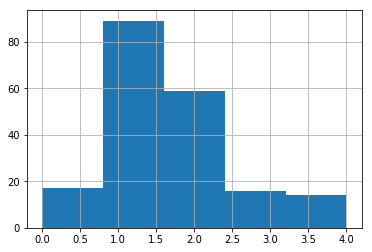

In [80]:
age_dataset['age'].hist(bins=len(ages))
plt.show()

> Clearly we have huge class imbalance. Will work on balance once I have something trained on this dataset. 

###### Dataset

In [86]:
age_dataset.to_csv('age_dataset.csv', index=False)

## Preparing Emotion Dataset

In [87]:
## Number of NaNs
print("Number of Unknown Values: ", emotion_df['emotion'].isnull().sum())

Number of Unknown Values:  0


In [88]:
emotion_df['emotion'].unique()

array(['Emotion_Happy', 'Emotion_Neutral', 'Emotion_Sad', 'Emotion_Angry'],
      dtype=object)

##### Encoding Age Categories

In [89]:
def encodeEmotion(category):
    if category=='Emotion_Happy':
        return 0
    if category=='Emotion_Neutral':
        return 1
    if category=='Emotion_Sad':
        return 2
    if category=='Emotion_Angry':
        return 3

In [92]:
emotion_dataset = pd.DataFrame(columns=emotion_df.columns)
emotion_data = emotion_df.values

c = 0
for item in tqdm(emotion_data):
    emotion_dataset.loc[c] = [item[0], encodeEmotion(item[1])]
    c+=1

100%|███████████████████████████████████████████████████████████████████████████████| 209/209 [00:00<00:00, 381.02it/s]


###### Dtypes

In [94]:
emotion_dataset.dtypes

face_id    object
emotion    object
dtype: object

In [95]:
emotion_dataset['emotion'] = pd.to_numeric(emotion_dataset['emotion'])

In [96]:
emotion_dataset.dtypes

face_id    object
emotion     int64
dtype: object

In [97]:
emotion_dataset['emotion'].describe()

count    209.000000
mean       0.784689
std        0.662567
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: emotion, dtype: float64

##### Distribution

In [98]:
emotions = emotion_dataset['emotion'].unique()
emotions.sort()
emotions

array([0, 1, 2, 3], dtype=int64)

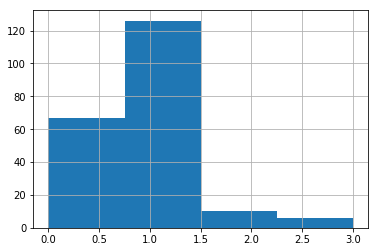

In [99]:
emotion_dataset['emotion'].hist(bins=len(emotions))
plt.show()

> High Class imbalance. 

###### Dataset

In [100]:
emotion_dataset.to_csv('emotion_dataset.csv', index=False)

## Prepare Gender-Ethnicity Dataset

In [101]:
## Number of NaNs
print("Number of Unknown gender: ", gender_ethnicity_df['gender'].isnull().sum())
print("Number of Unknown ethnicity", gender_ethnicity_df['race'].isnull().sum())

Number of Unknown gender:  15
Number of Unknown ethnicity 15


In [103]:
gender_ethnicity_df[gender_ethnicity_df.isna().any(axis=1)]

,face_id,gender,race
52,quckabitqj,NaN,NaN
62,euqgerezql,NaN,NaN
75,crgxxxlkya,NaN,NaN
126,hnmhcsfsov,NaN,NaN
127,zywiqzpbix,NaN,NaN
128,duwfryootg,NaN,NaN
129,cnmnqvbdzk,NaN,NaN
160,anahmyopuz,NaN,NaN
161,zsefynvadl,NaN,NaN
164,twfncbxfqy,NaN,NaN


In [104]:
unlabeled_ge = gender_ethnicity_df[gender_ethnicity_df.isna().any(axis=1)]['face_id']

In [105]:
unlabeled_ge = unlabeled_ge.values
unlabeled_ge

array(['quckabitqj', 'euqgerezql', 'crgxxxlkya', 'hnmhcsfsov',
       'zywiqzpbix', 'duwfryootg', 'cnmnqvbdzk', 'anahmyopuz',
       'zsefynvadl', 'twfncbxfqy', 'sextrunqgl', 'qhggohgwhm',
       'bfhqkogkvf', 'jjyfskaoxm', 'ixtqxzkkgo'], dtype=object)

In [106]:
np.savetxt('gender_ethnicity_test.out', unlabeled_ge, delimiter=',', fmt='%s')

> Will use these unlabaled age data as test data ^_^

##### Dropping them from age_df. 

In [107]:
gender_ethnicity_df = gender_ethnicity_df.dropna()

In [108]:
gender_ethnicity_df.count()

face_id    194
gender     194
race       194
dtype: int64

In [111]:
print("Gender: ", gender_ethnicity_df['gender'].unique())
print("Ethnicity: ", gender_ethnicity_df['race'].unique())

Gender:  ['G_Male' 'G_ Female']
Ethnicity:  ['E_White' 'E_Hispanic' 'E_Asian' 'E_Black' 'E_Arab' 'E_Indian']


##### Encoding Gender-Ethnicity Labels

In [112]:
def encodeGenderEthnicity(ged, eth):
    if ged=='G_Male' and eth=='E_White':
        return 0
    if ged=='G_Male' and eth=='E_Hispanic':
        return 1
    if ged=='G_Male' and eth=='E_Asian':
        return 2
    if ged=='G_Male' and eth=='E_Black':
        return 3
    if ged=='G_Male' and eth=='E_Arab':
        return 4
    if ged=='G_Male' and eth=='E_Indian':
        return 5
    if ged=='G_ Female' and eth=='E_White':
        return 6
    if ged=='G_ Female' and eth=='E_Hispanic':
        return 7
    if ged=='G_ Female' and eth=='E_Asian':
        return 8
    if ged=='G_ Female' and eth=='E_Black':
        return 9
    if ged=='G_ Female' and eth=='E_Arab':
        return 10
    if ged=='G_ Female' and eth=='E_Indian':
        return 11

In [117]:
gender_ethnicity_dataset = pd.DataFrame(columns=['face_id', 'gender_race'])
ge_data = gender_ethnicity_df.values

c = 0
for item in tqdm(ge_data):
    gender_ethnicity_dataset.loc[c] = [item[0], encodeGenderEthnicity(item[1], item[2])]
    c+=1

100%|███████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<00:00, 406.94it/s]


In [121]:
gender_ethnicity_dataset['gender_race'].describe()

count     194
unique     12
top         6
freq       61
Name: gender_race, dtype: int64

##### Dtypes

In [122]:
gender_ethnicity_dataset.dtypes

face_id        object
gender_race    object
dtype: object

In [128]:
gender_ethnicity_dataset['gender_race'] = pd.to_numeric(gender_ethnicity_dataset['gender_race'])

In [129]:
gender_ethnicity_dataset.dtypes

face_id        object
gender_race     int64
dtype: object

##### Distribution

In [130]:
ge = gender_ethnicity_dataset['gender_race'].unique()
ge.sort()
ge

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

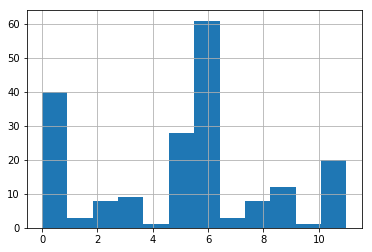

In [132]:
gender_ethnicity_dataset['gender_race'].hist(bins=len(ge));
plt.show()

> Again Class Imbalance

###### Dataset

In [133]:
gender_ethnicity_dataset.to_csv('gender_race_dataset.csv', index=False)

## Prepare Gender Dataset

In [134]:
gender_df = data[['face_id', 'gender']]

In [135]:
gender_df.count()

face_id    209
gender     194
dtype: int64

In [137]:
## Number of NaNs
print("Number of Unknown Values: ", gender_df['gender'].isnull().sum())

Number of Unknown Values:  15


In [138]:
gender_df[gender_df.isna().any(axis=1)]

,face_id,gender
52,quckabitqj,NaN
62,euqgerezql,NaN
75,crgxxxlkya,NaN
126,hnmhcsfsov,NaN
127,zywiqzpbix,NaN
128,duwfryootg,NaN
129,cnmnqvbdzk,NaN
160,anahmyopuz,NaN
161,zsefynvadl,NaN
164,twfncbxfqy,NaN


In [141]:
gender_df = gender_df.dropna()

In [142]:
gender_df.count()

face_id    194
gender     194
dtype: int64

In [143]:
gender_df['gender'].unique()

array(['G_Male', 'G_ Female'], dtype=object)

In [144]:
def encodeGender(category):
    if category=='G_Male':
        return 0
    if category=='G_ Female':
        return 1

In [145]:
gender_dataset = pd.DataFrame(columns=['face_id', 'gender'])
gender_data = gender_df.values

c = 0
for item in tqdm(gender_data):
    gender_dataset.loc[c] = [item[0], encodeGender(item[1])]
    c+=1

100%|███████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<00:00, 390.13it/s]


In [147]:
gender_dataset.head()

,face_id,gender
0,wlcxfikkvv,0
1,hpizdgvpfv,1
2,iieznhvpqf,1
3,xzyvxfndiv,1
4,qbkqlybrxs,1


In [149]:
gender_dataset['gender'] = pd.to_numeric(gender_dataset['gender'])

In [150]:
gender = gender_dataset['gender'].unique()
gender.sort()
gender

array([0, 1], dtype=int64)

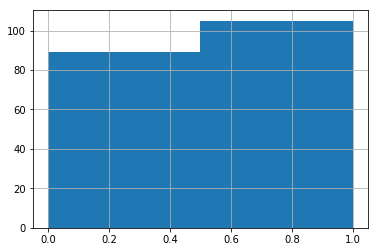

In [167]:
gender_dataset['gender'].hist(bins=len(gender));

> Better

In [152]:
gender_dataset.to_csv('gender.csv', index=False)

## Prepare Ethnicity Dataset

In [153]:
race_df = data[['face_id', 'race']]

In [154]:
race_df.head()

,face_id,race
0,wlcxfikkvv,E_White
1,hpizdgvpfv,E_White
2,iieznhvpqf,E_Hispanic
3,xzyvxfndiv,E_White
4,qbkqlybrxs,E_White


In [156]:
## Number of NaNs
print("Number of Unknown Values: ", race_df['race'].isnull().sum())

Number of Unknown Values:  15


In [157]:
race_df[race_df.isna().any(axis=1)]

,face_id,race
52,quckabitqj,NaN
62,euqgerezql,NaN
75,crgxxxlkya,NaN
126,hnmhcsfsov,NaN
127,zywiqzpbix,NaN
128,duwfryootg,NaN
129,cnmnqvbdzk,NaN
160,anahmyopuz,NaN
161,zsefynvadl,NaN
164,twfncbxfqy,NaN


In [158]:
race_df = race_df.dropna()

In [161]:
race_df['race'].unique()

array(['E_White', 'E_Hispanic', 'E_Asian', 'E_Black', 'E_Arab',
       'E_Indian'], dtype=object)

In [163]:
def encodeRace(category):
    if category=='E_White':
        return 0
    if category=='E_Hispanic':
        return 1
    if category=='E_Asian':
        return 2
    if category=='E_Black':
        return 3
    if category=='E_Arab':
        return 4
    if category=='E_Indian':
        return 5

In [164]:
race_dataset = pd.DataFrame(columns=['face_id', 'race'])
race_data = race_df.values

c = 0
for item in tqdm(race_data):
    race_dataset.loc[c] = [item[0], encodeRace(item[1])]
    c+=1

100%|███████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<00:00, 365.63it/s]


In [165]:
race_dataset['race'] = pd.to_numeric(race_dataset['race'])

In [166]:
race = race_dataset['race'].unique()
race.sort()
race

array([0, 1, 2, 3, 4, 5], dtype=int64)

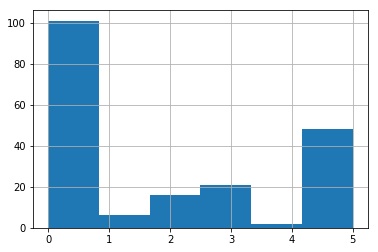

In [168]:
race_dataset['race'].hist(bins=len(race));

In [169]:
race_dataset.to_csv('race.csv', index=False)